In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
# Step 3: Check info and missing values
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# Step 4: Fill missing values (if any) let
df.fillna(df.mean(numeric_only=True), inplace=True)

In [7]:

# Step 5: Remove duplicates
df.drop_duplicates(inplace=True)

In [8]:

# Check cleaned data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [9]:
# Simulate integration by combining two parts of the same dataset
df2 = df.sample(50, random_state=1)
df_combined = pd.concat([df, df2], ignore_index=True)

In [10]:
# Remove duplicates after integration
df_combined.drop_duplicates(inplace=True)
df_combined.shape

(302, 14)

In [11]:
# Convert categorical values using One-Hot Encoding
df_combined = pd.get_dummies(df_combined, columns=['cp', 'thal', 'slope'], drop_first=True)

In [12]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cols_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df_combined[cols_to_scale] = scaler.fit_transform(df_combined[cols_to_scale])


In [13]:
df_combined.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_1,slope_2
0,0.479167,1,0.292453,0.196347,0,1,0.740458,0,0.161290,2,0,False,False,False,False,False,True,False,True
1,0.500000,1,0.433962,0.175799,1,0,0.641221,1,0.500000,0,0,False,False,False,False,False,True,False,False
2,0.854167,1,0.481132,0.109589,0,1,0.412214,1,0.419355,0,0,False,False,False,False,False,True,False,False
3,0.666667,1,0.509434,0.175799,0,1,0.687023,0,0.000000,1,0,False,False,False,False,False,True,False,True
4,0.687500,0,0.415094,0.383562,1,1,0.267176,0,0.306452,3,0,False,False,False,False,True,False,True,False


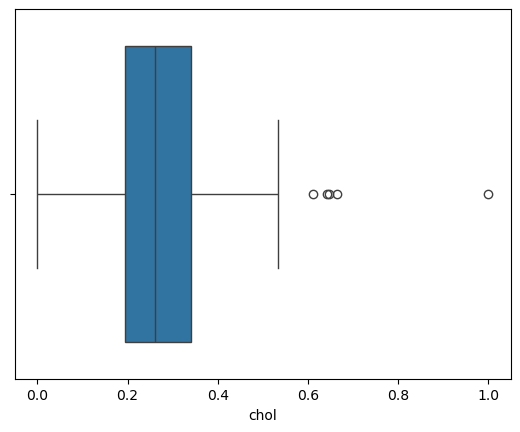

In [14]:
# Visualize cholesterol outliers
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=df_combined['chol'])
plt.show()

In [15]:
# Cap outliers using IQR method
Q1 = df_combined['chol'].quantile(0.25)
Q3 = df_combined['chol'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_combined['chol'] = np.where(df_combined['chol'] > upper_bound, upper_bound,
                               np.where(df_combined['chol'] < lower_bound, lower_bound, df_combined['chol']))


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [17]:
# Prepare features and label
X = df_combined.drop('target', axis=1)
y = df_combined['target']

In [18]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [20]:
# Predict and evaluate
y_pred = model.predict(X_test)

In [21]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7868852459016393

Confusion Matrix:
 [[22 10]
 [ 3 26]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.69      0.77        32
           1       0.72      0.90      0.80        29

    accuracy                           0.79        61
   macro avg       0.80      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61

